## How to Train YOLOv8 Object Detection on a Custom Dataset

In [1]:
!nvidia-smi

Tue Dec 26 01:24:36 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.2/663.2 kB 3.4 MB/s eta 0:00:00


## Install YOLOv8

In [3]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo mode=checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 395, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.10/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are ('train', 'val', 'predict', 'export', 'track', 'benchmark').

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of ('detect', 'segment', 'classify', 'pose')
                MODE (required) is one of ('train', 'val', 'predict', 'export', 'track', 'benchmark')
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at https://d

## Train YOLOv8 Model on Custom Dataset

In [6]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="5Ik2VyS9p53rtMZ58Xp2")
project = rf.workspace("samy-toqmo").project("hci-elgdy")
dataset = project.version(1).download("yolov8")

  Using cached roboflow-1.1.14-py3-none-any.whl (68 kB)
  Using cached certifi-2023.7.22-py3-none-any.whl (158 kB)
  Using cached chardet-4.0.0-py2.py3-none-any.whl (178 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached idna-2.10-py2.py3-none-any.whl (58 kB)
  Using cached opencv_python_headless-4.8.0.74-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (49.1 MB)
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
  Using cached python_dotenv-1.0.0-py3-none-any.whl (19 kB)
  Using cached supervision-0.17.1-py3-none-any.whl (77 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 894.4 kB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Succes

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.229, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Hci-1 in yolov8:: 100%|██████████| 710/710 [00:00<00:00, 6683.08it/s]


In [9]:
!yolo task=detect mode=train model=yolov8m.pt data='/content/Hci-1/data.yaml' epochs=50 imgsz=640

Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Hci-1/data.yaml, epochs=50, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_wid

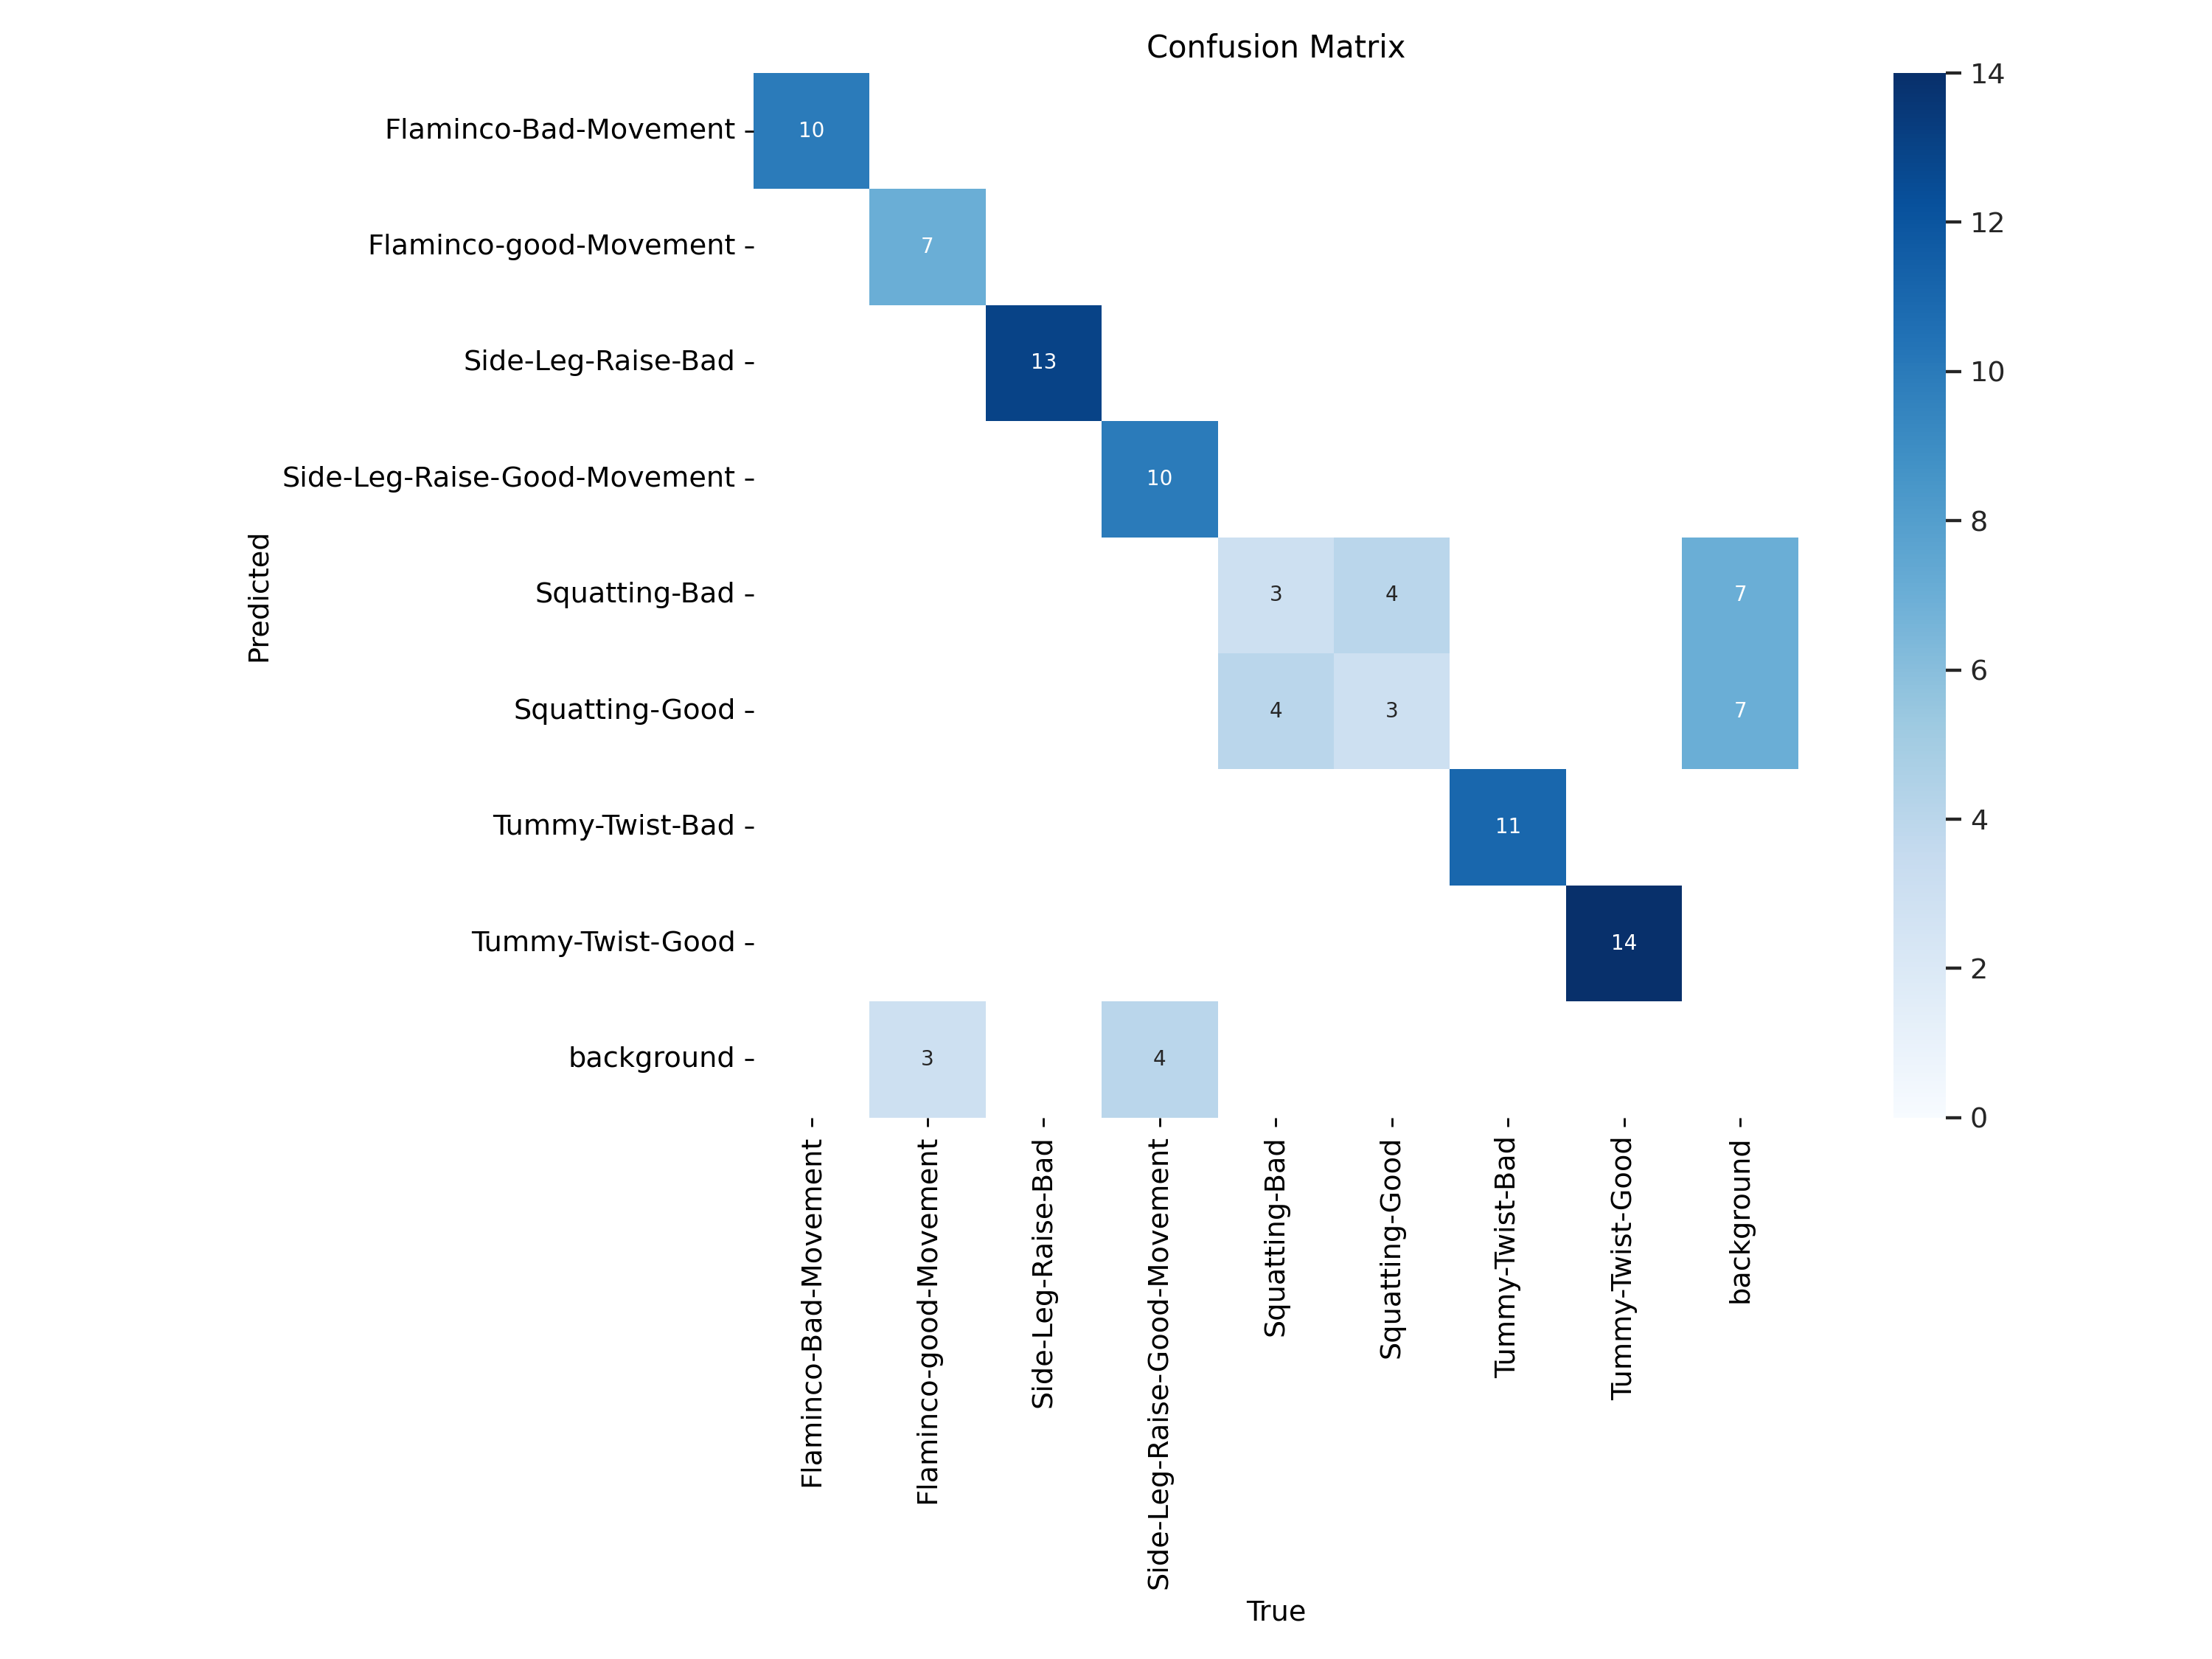

In [10]:
Image(filename=f'/content/runs/detect/train2/confusion_matrix.png', width=600)

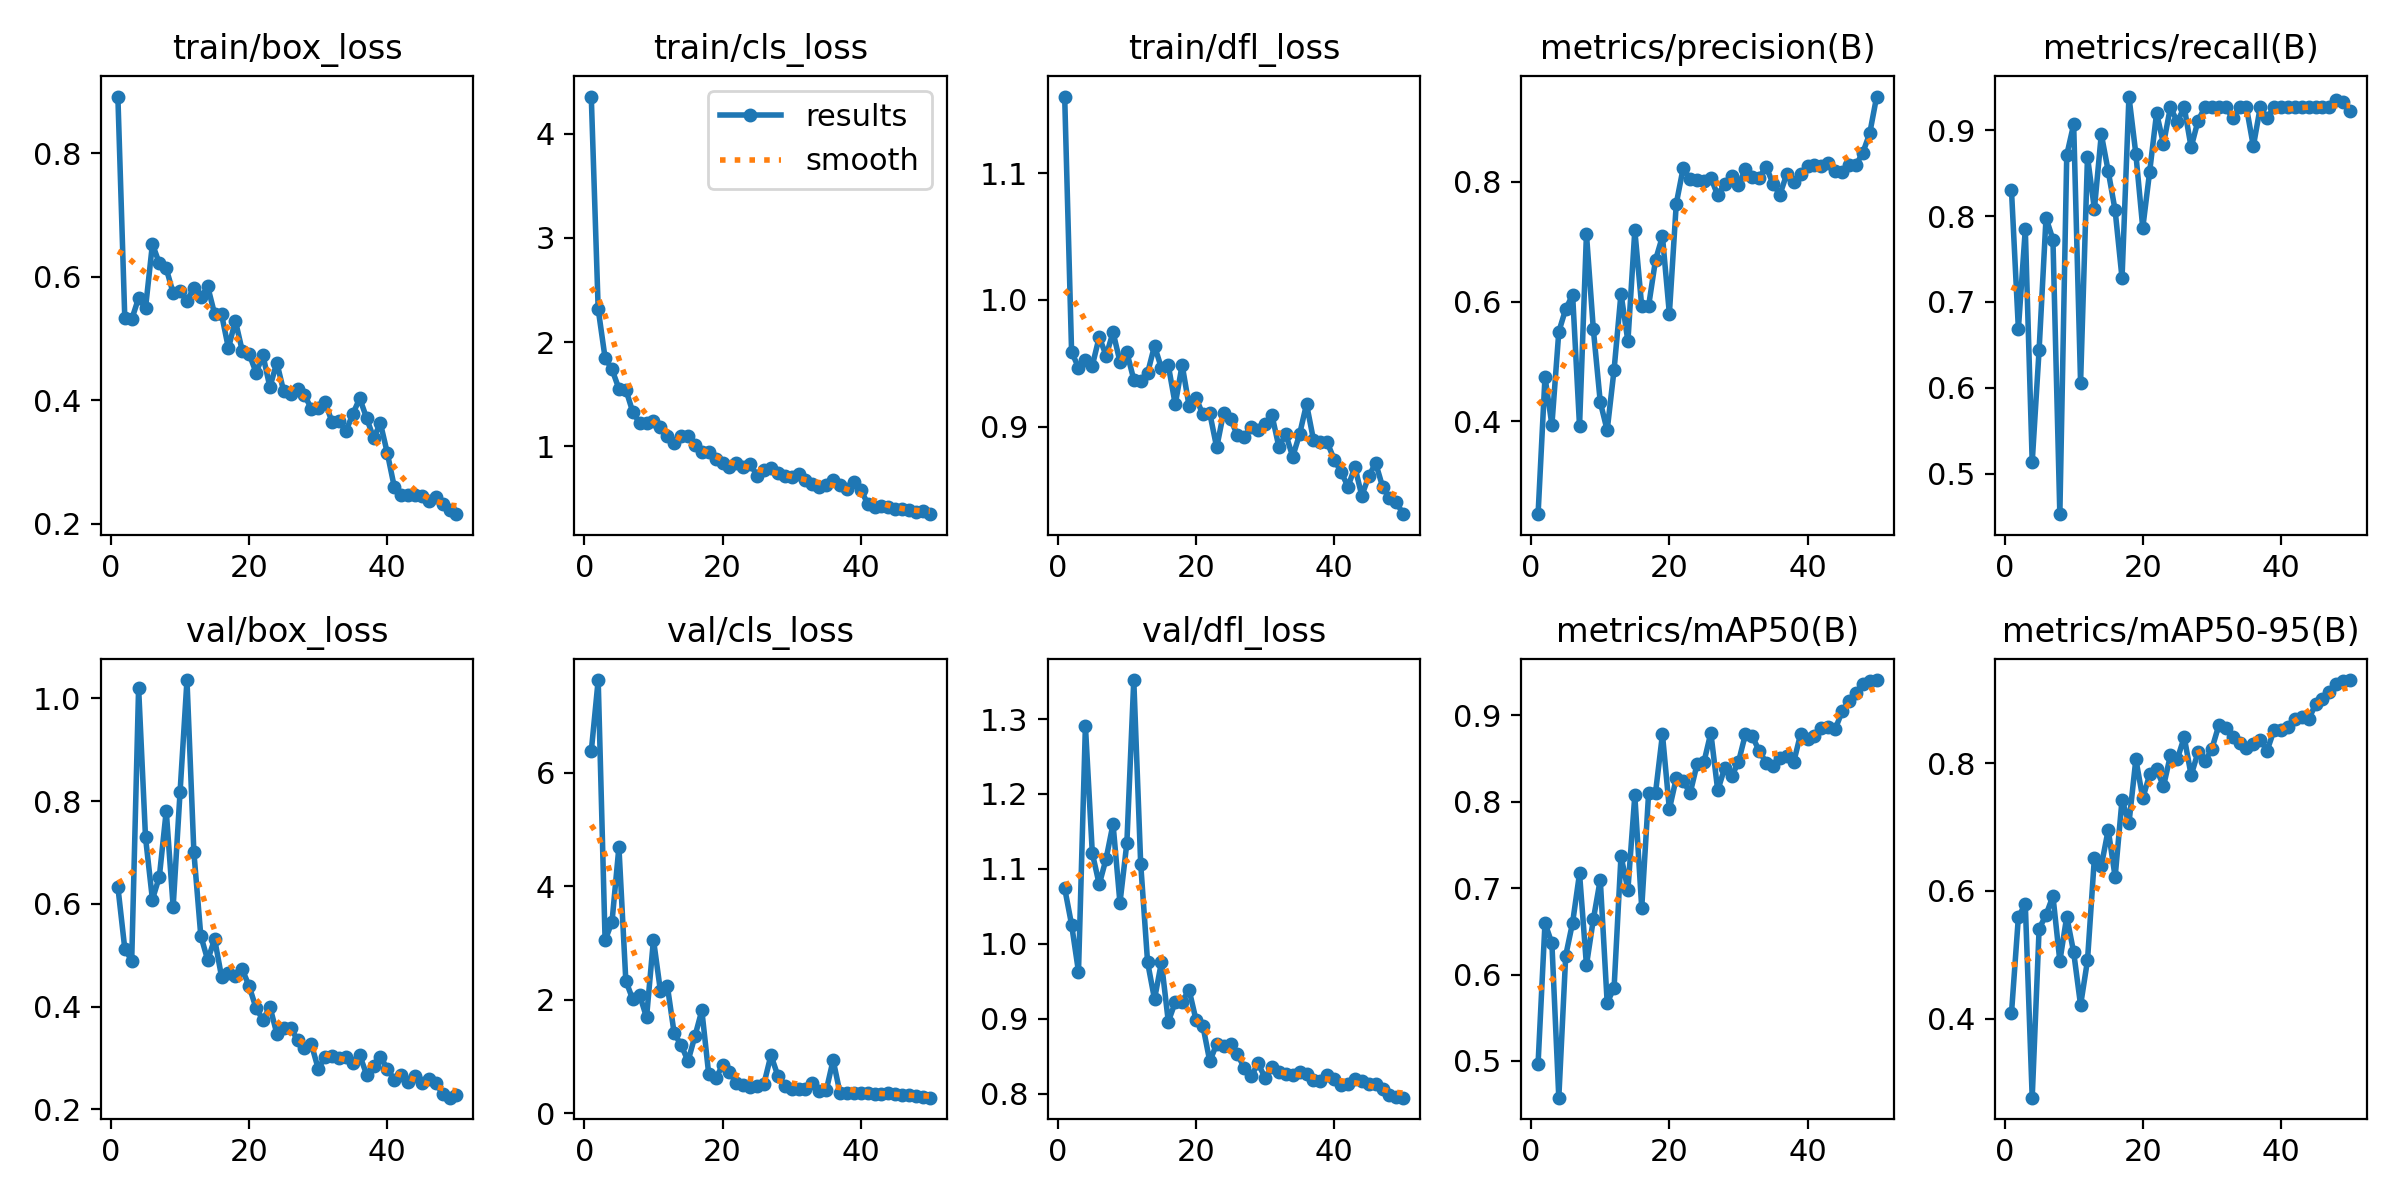

In [11]:
Image(filename=f'/content/runs/detect/train2/results.png', width=600)

In [14]:
!yolo task=detect mode=val model=/content/runs/detect/train2/weights/best.pt data='/content/Hci-1/data.yaml'

Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25844392 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/Hci-1/valid/labels.cache... 69 images, 0 backgrounds, 0 corrupt: 100% 69/69 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 5/5 [00:04<00:00,  1.04it/s]
                   all         69         86      0.942      0.923      0.941       0.93
 Flaminco-Bad-Movement         69         10       0.95          1      0.995      0.995
Flaminco-good-Movement         69         10       0.88      0.737      0.796      0.786
    Side-Leg-Raise-Bad         69         13      0.969          1      0.995       0.99
Side-Leg-Raise-Good-Movement         69         14       0.96      0.714      0.777       0.76
         Squatting-Bad         69          7          1       0.93      0.995      0.995
        Squatting-Good         69          7      0

In [15]:
!yolo task=detect mode=predict model=/content/runs/detect/train2/weights/best.pt conf=0.5 source={dataset.location}/test/images save_txt=true save_conf=true

Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25844392 parameters, 0 gradients, 78.7 GFLOPs

image 1/34 /content/Hci-1/test/images/Flaminco-Bad-Movement-2_mp4-13_jpg.rf.8f5f03587341f05e7ac7013f6297de66.jpg: 640x640 1 Flaminco-Bad-Movement, 37.1ms
image 2/34 /content/Hci-1/test/images/Flaminco-Bad-Movement-2_mp4-15_jpg.rf.e0b33ee7f1d19d1e5b9d6f08ea6de72e.jpg: 640x640 1 Flaminco-Bad-Movement, 37.1ms
image 3/34 /content/Hci-1/test/images/Flaminco-Bad-Movement-2_mp4-17_jpg.rf.018b975ed446c35e6652fad60d0fe10a.jpg: 640x640 1 Flaminco-Bad-Movement, 37.1ms
image 4/34 /content/Hci-1/test/images/Flaminco-Bad-Movement-2_mp4-29_jpg.rf.323f783623917995ab72d5afa2015137.jpg: 640x640 1 Flaminco-Bad-Movement, 37.1ms
image 5/34 /content/Hci-1/test/images/Flaminco-Bad-Movement-2_mp4-41_jpg.rf.c14e79f534d7b518b16ad253726f0f4d.jpg: 640x640 1 Flaminco-Bad-Movement, 37.0ms
image 6/34 /content/Hci-1/test/images/Flaminco-Good-Movement

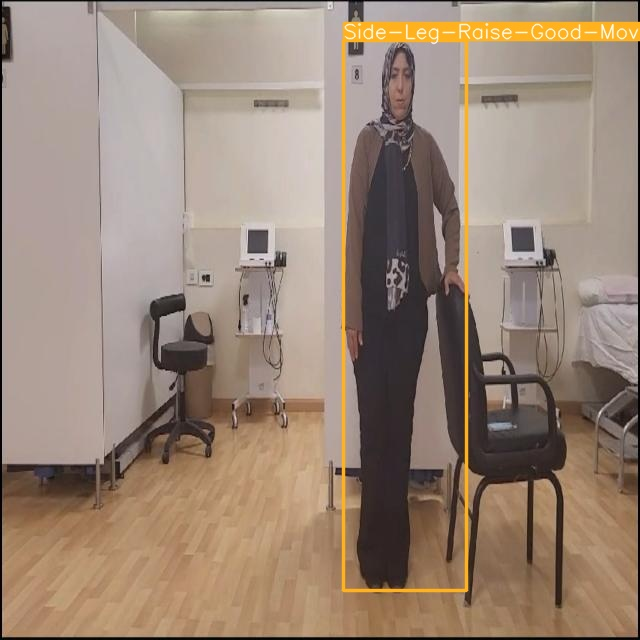

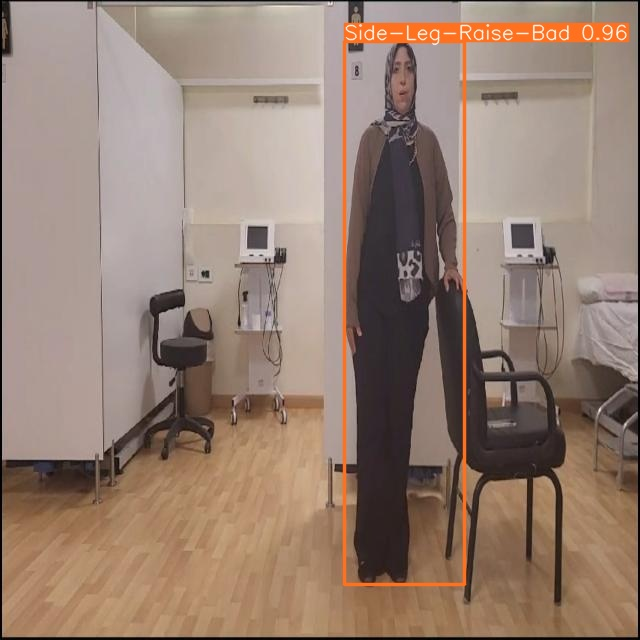

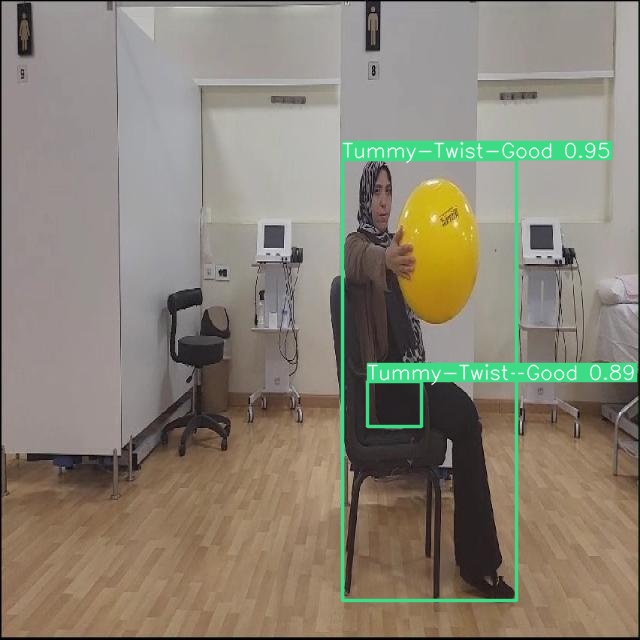

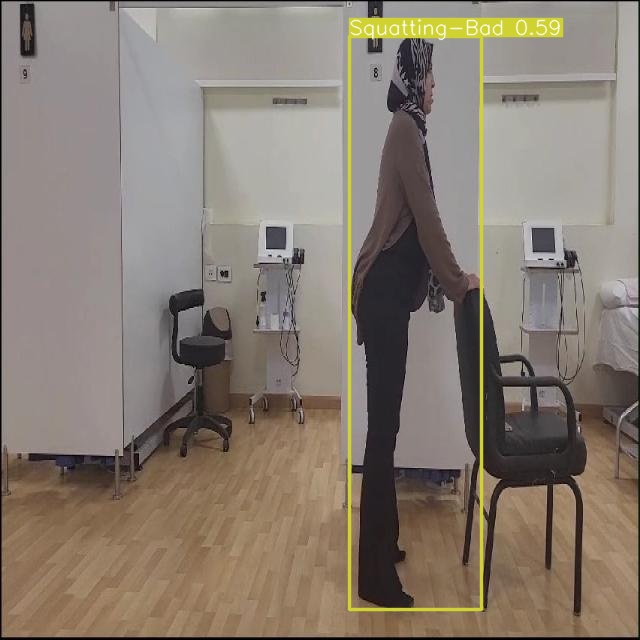

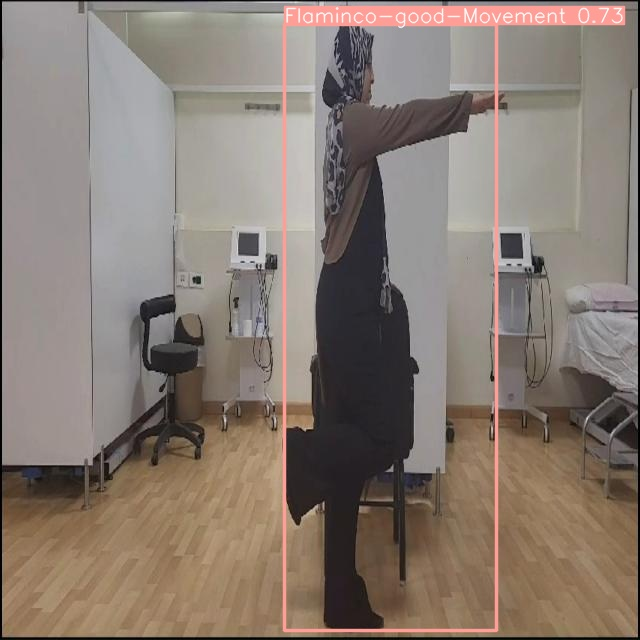

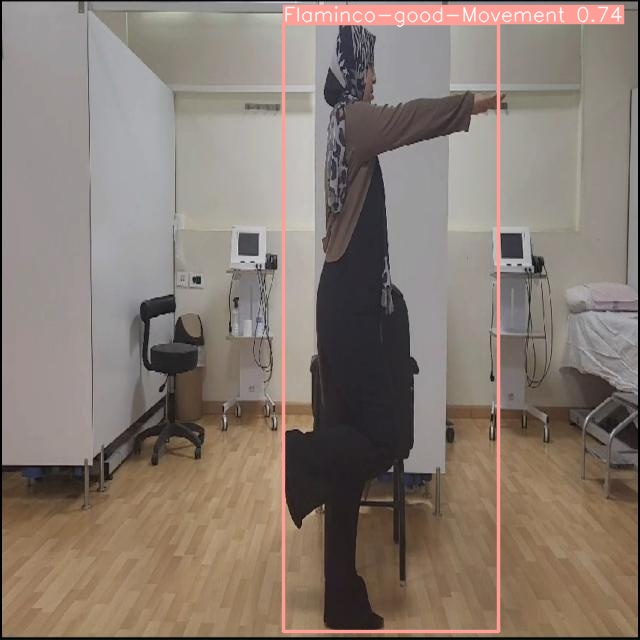

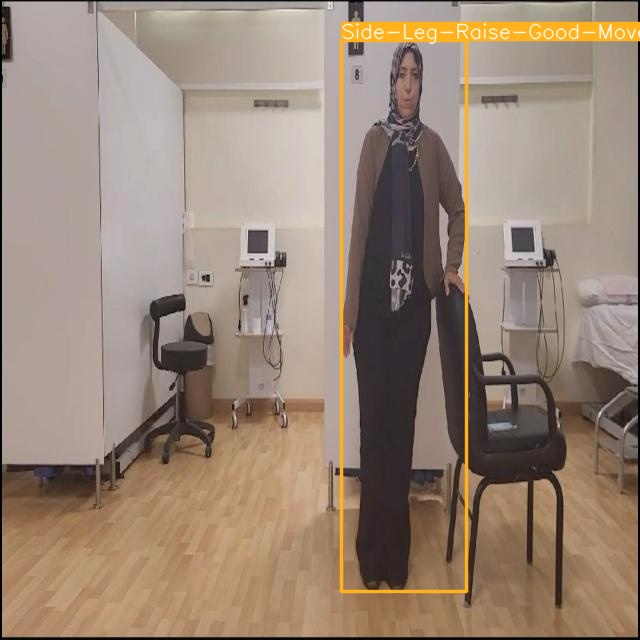

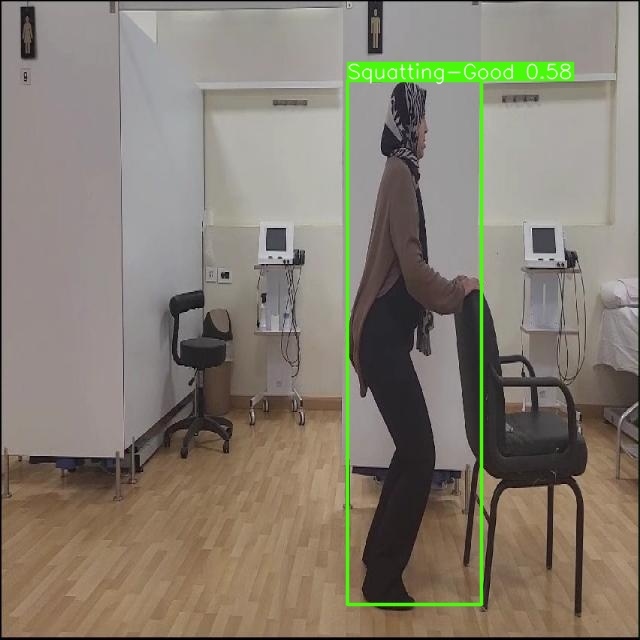

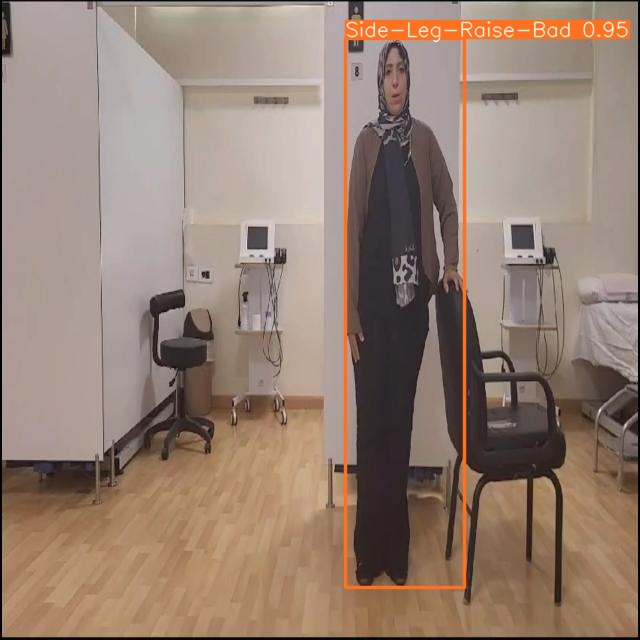

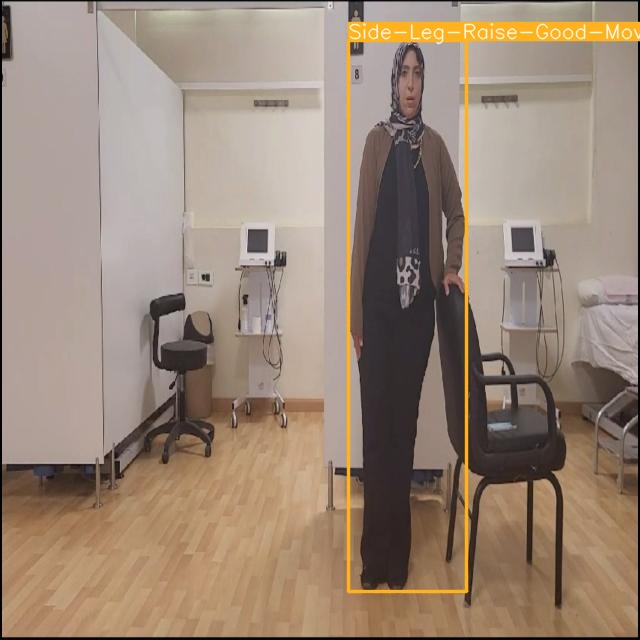

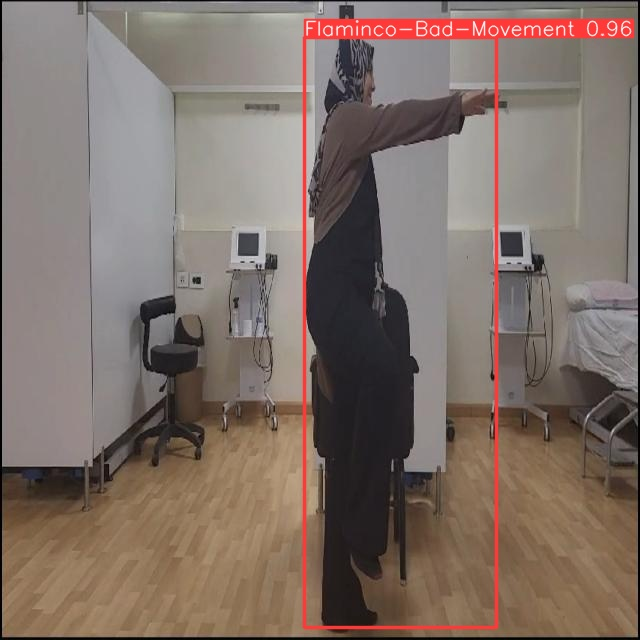

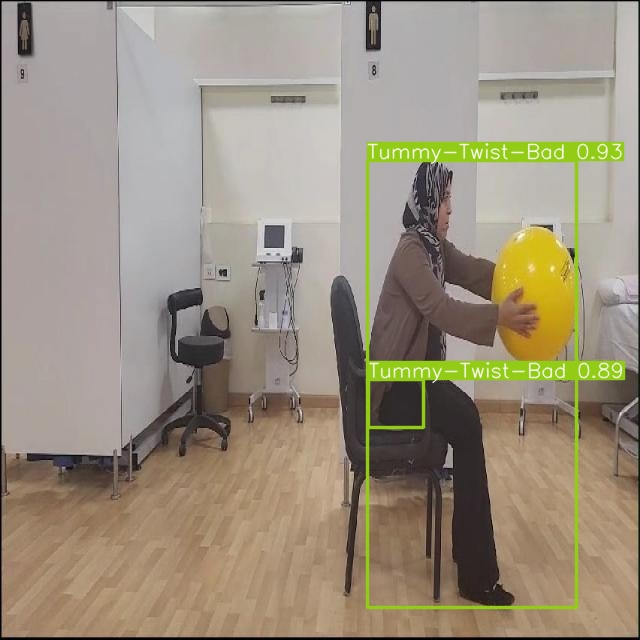

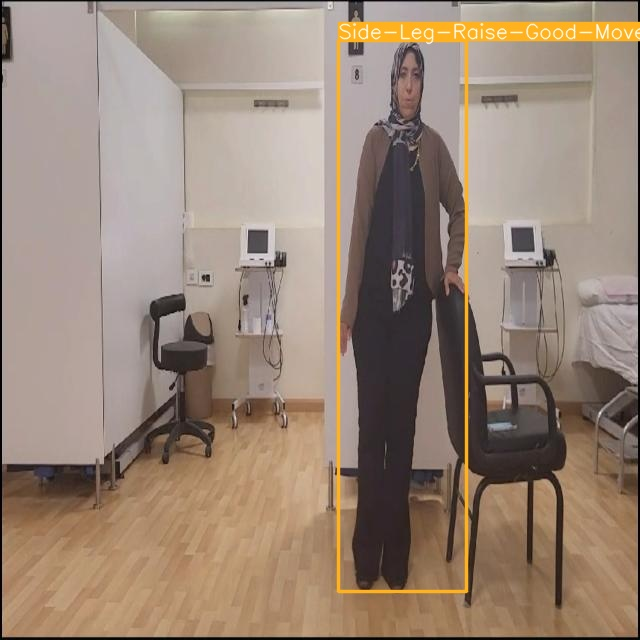

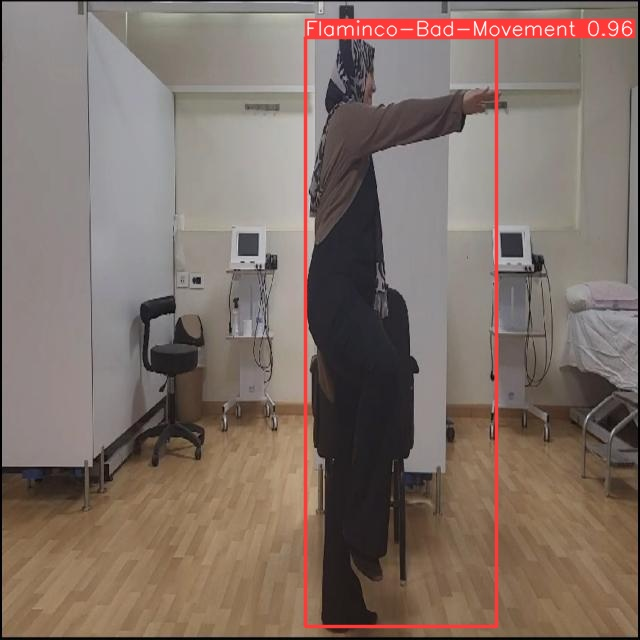

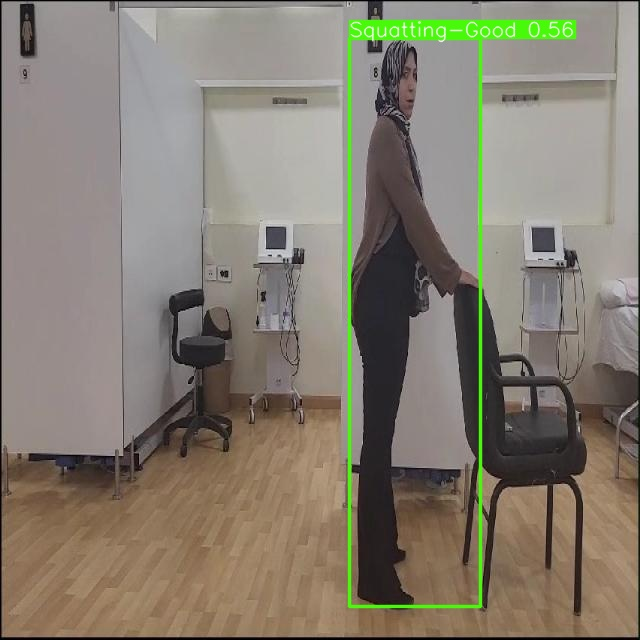

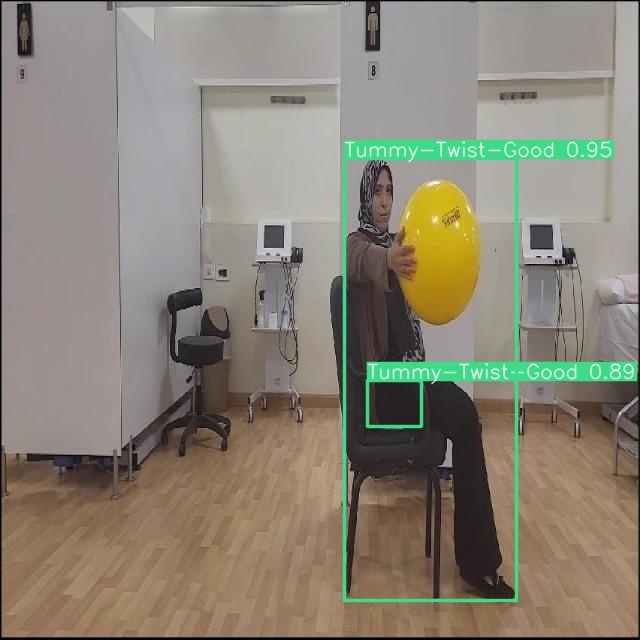

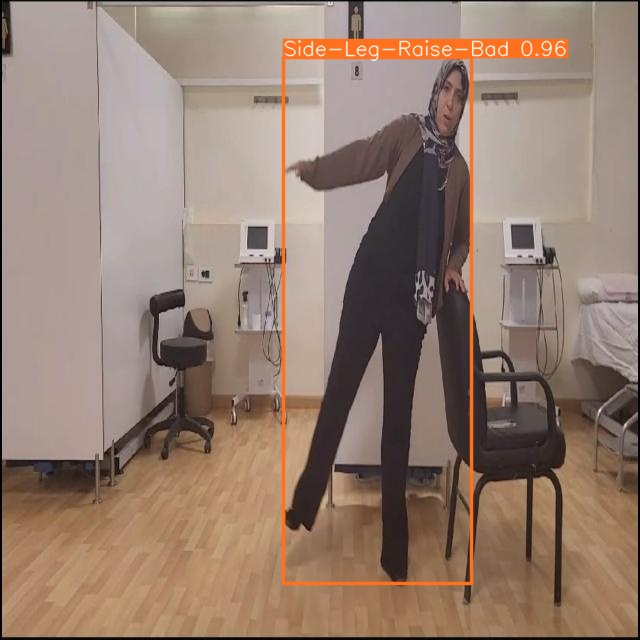

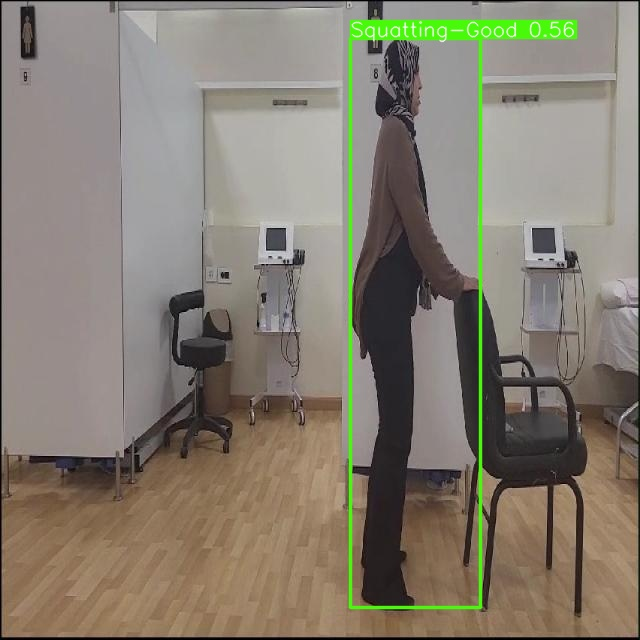

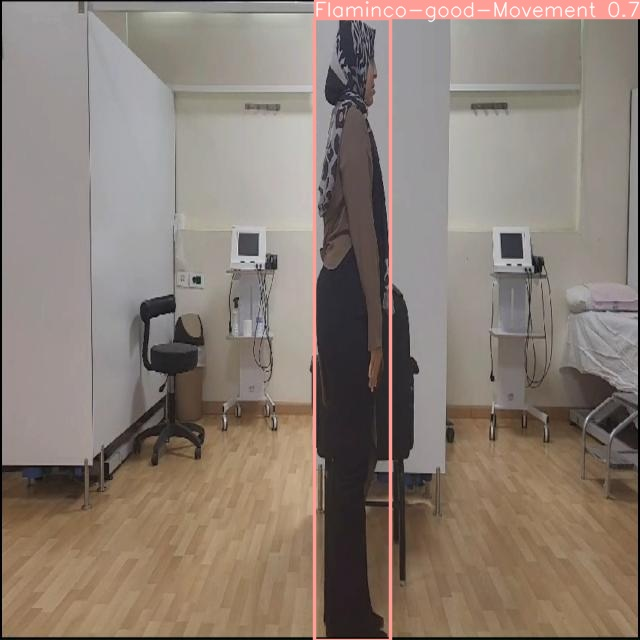

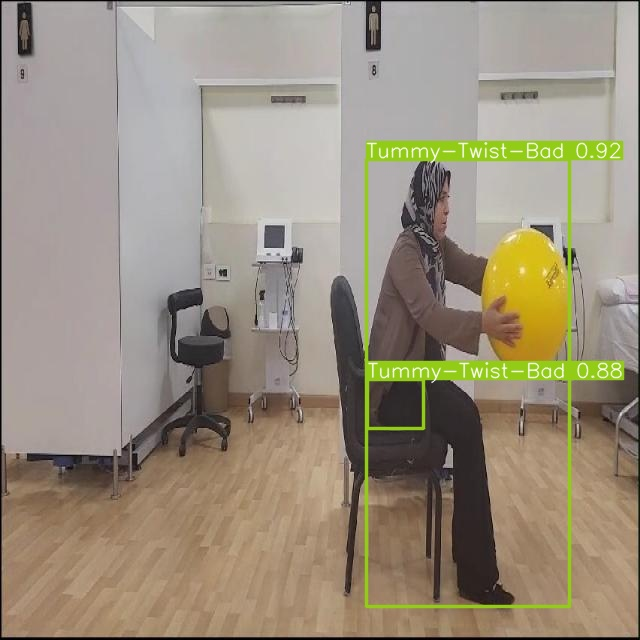

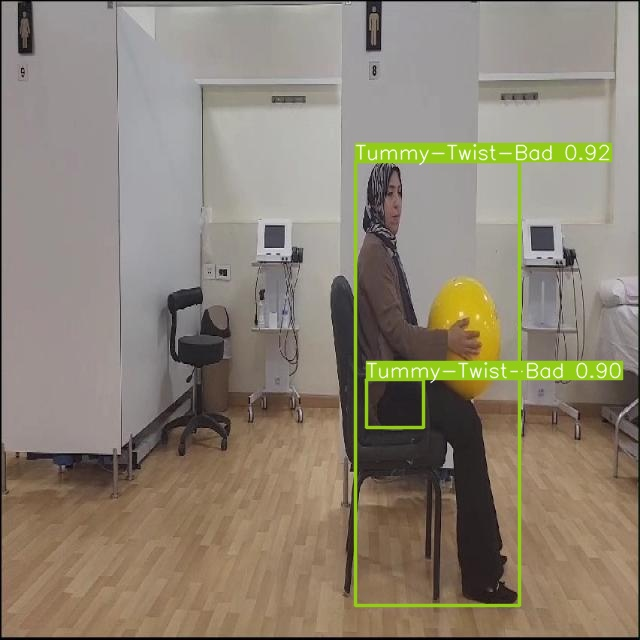

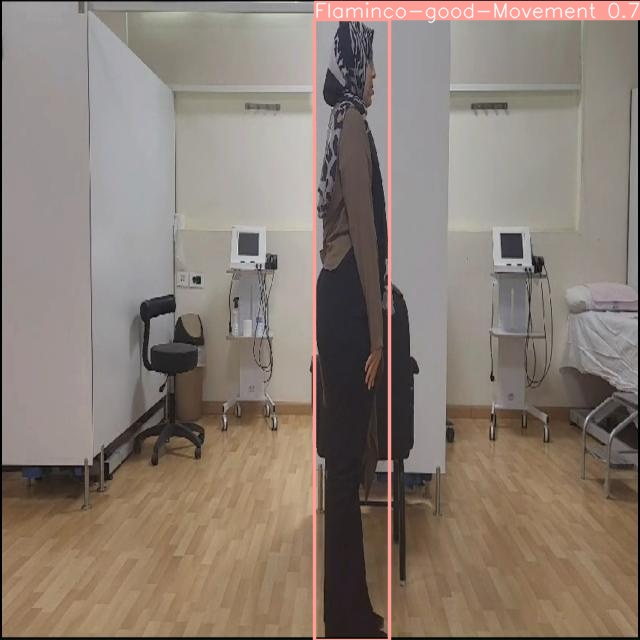

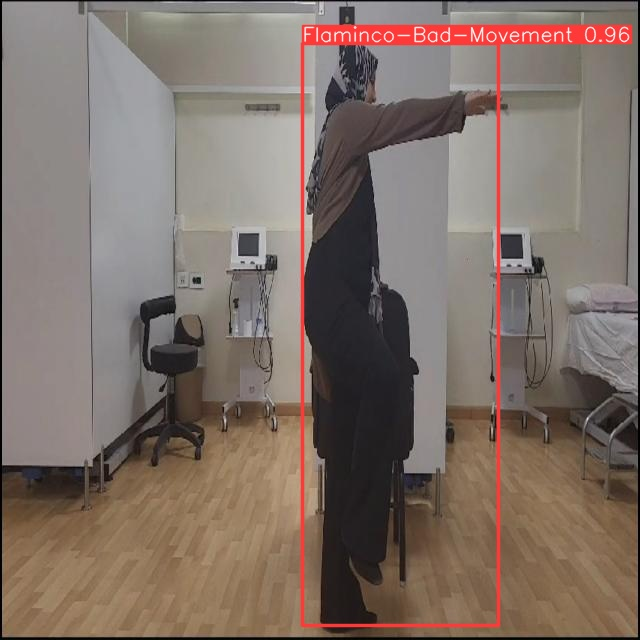

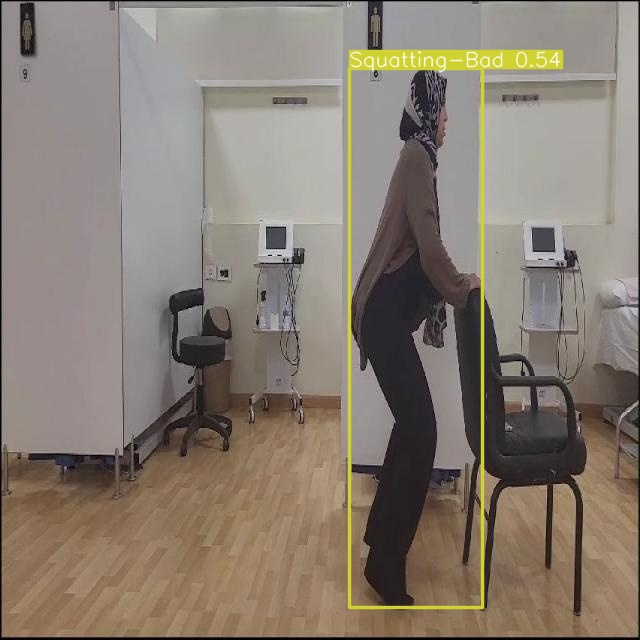

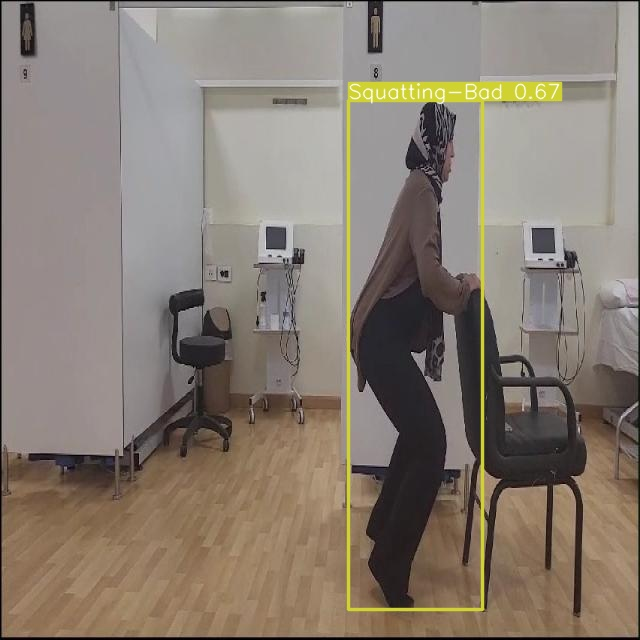

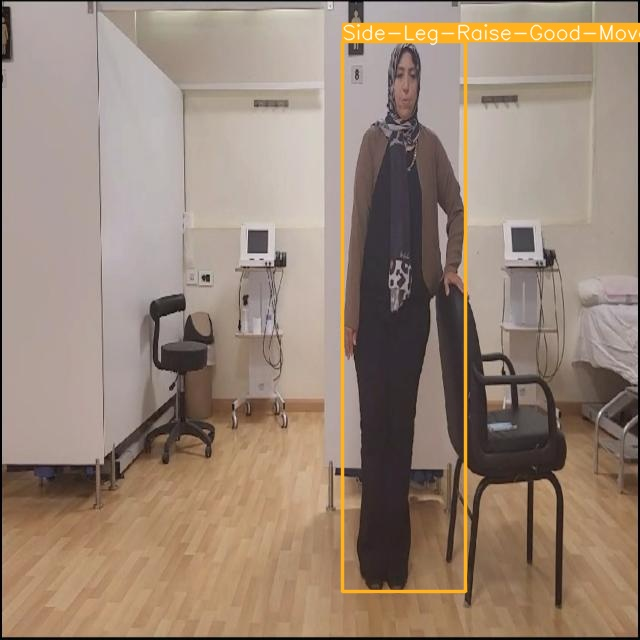

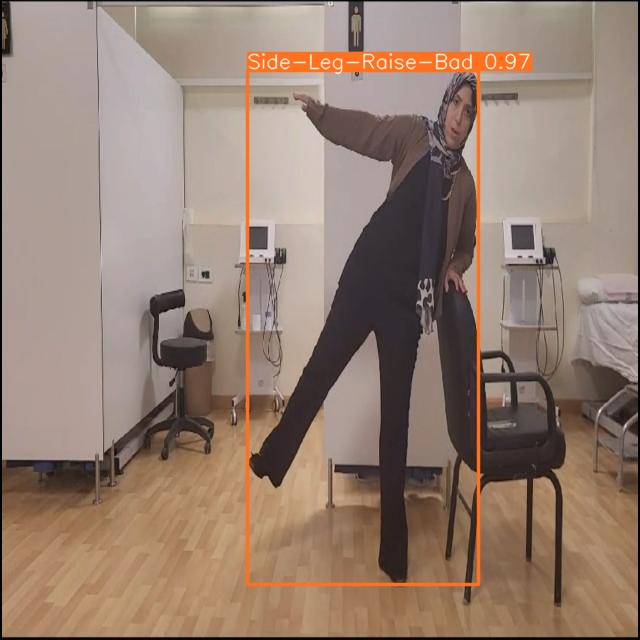

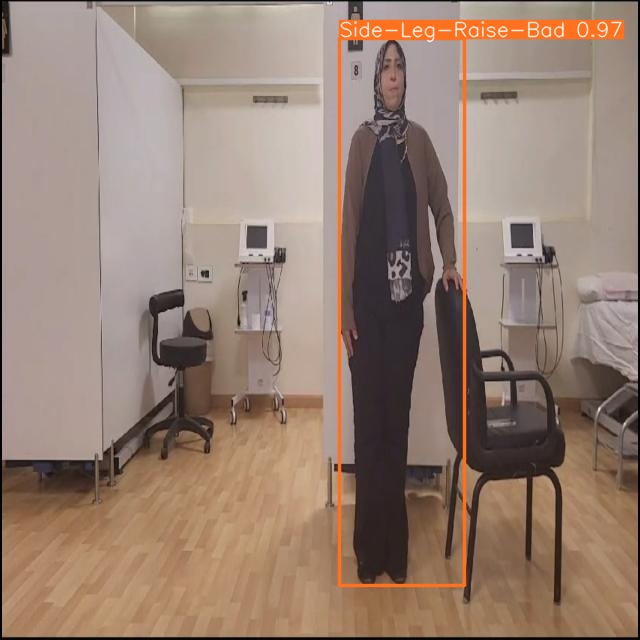

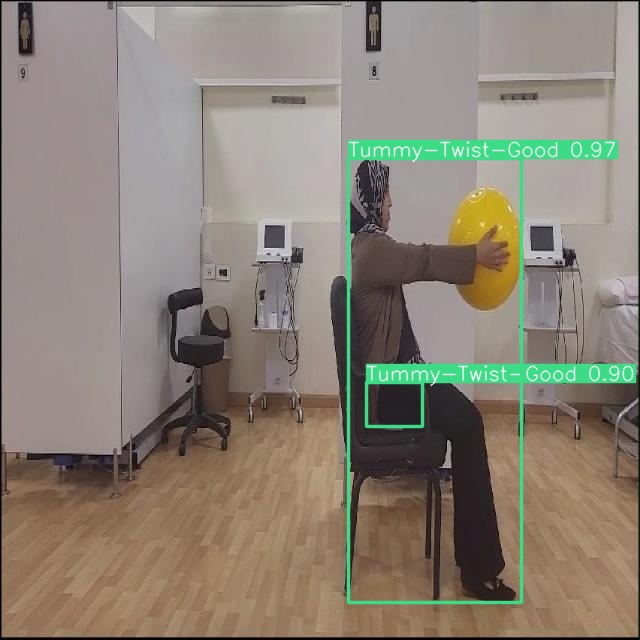

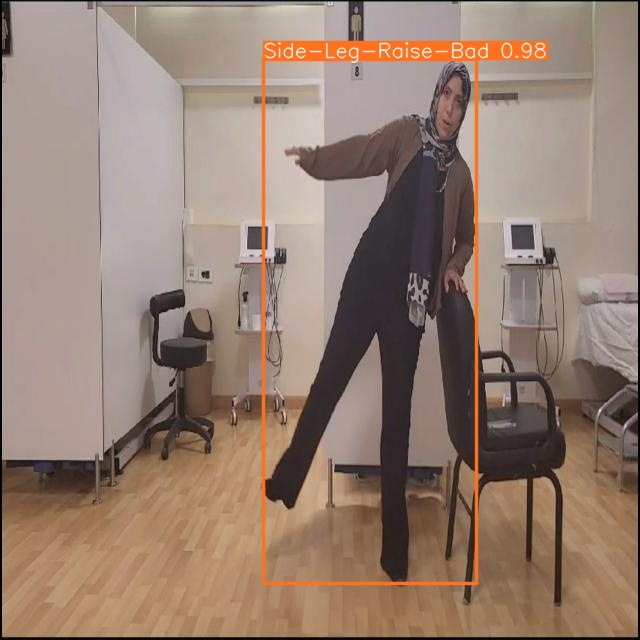

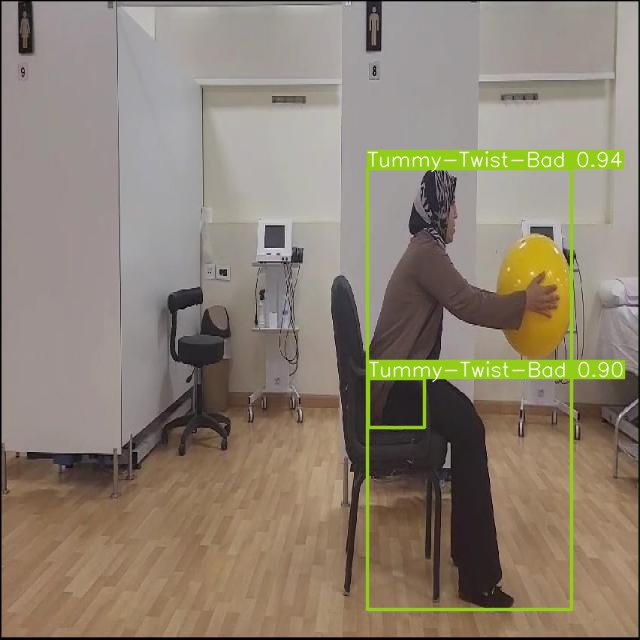

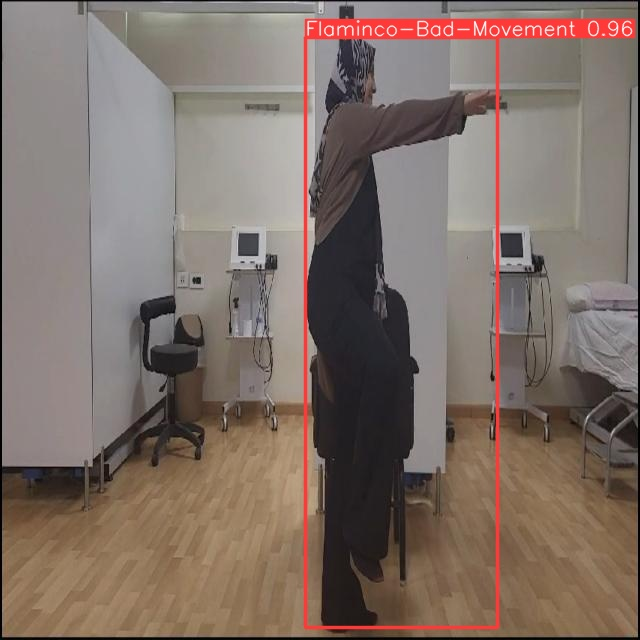

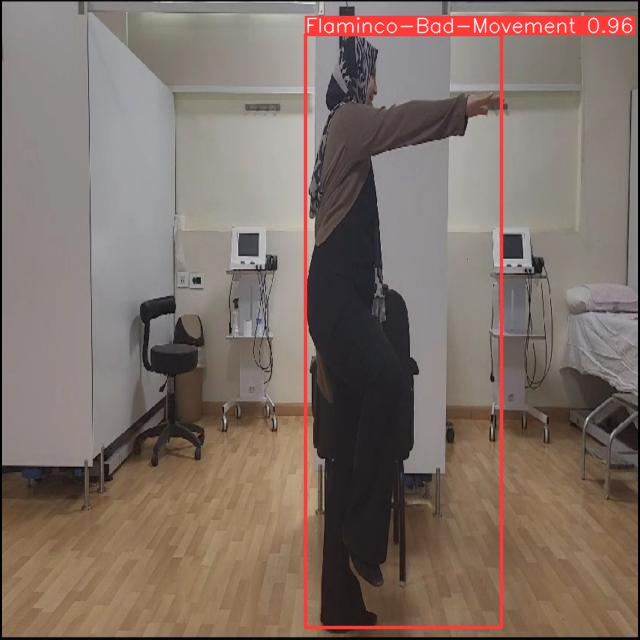

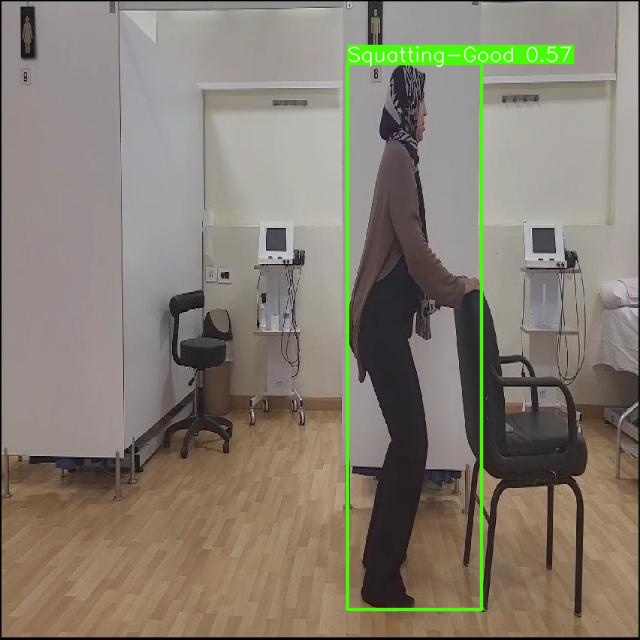

In [16]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg'):
      display(Image(filename=image_path, height=600))
      print("\n")